# PPHA 30546 Machine Learning Problem Set 1
## Richard Campo

### Chapter 2: Question 3
#### (a)

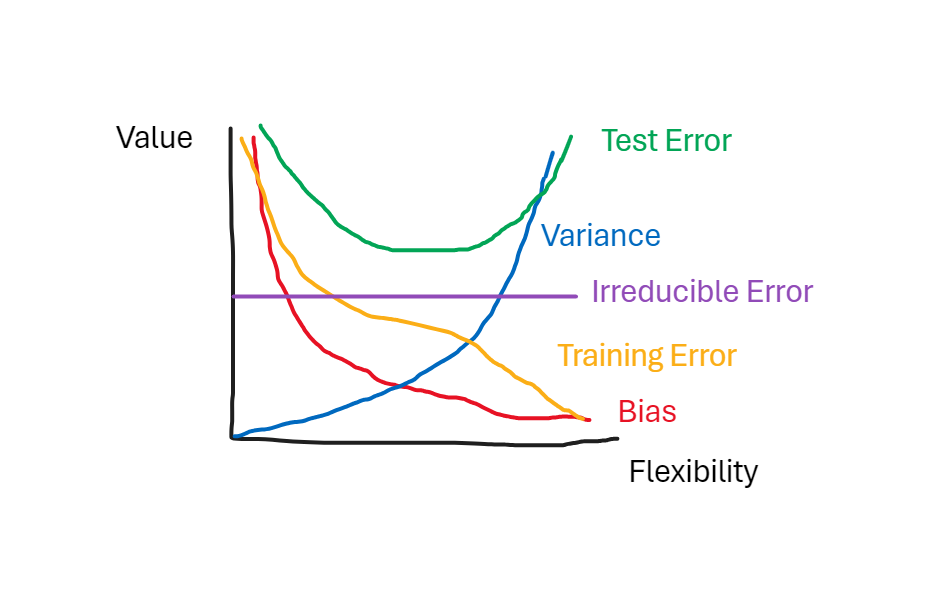

In [1]:
# https://stackoverflow.com/a/11855133
from IPython.display import Image
Image(filename="./Machine Learning Pset 1 Curves.png")

#### (b)
- Bias decreases as flexibility increases because the model can overfit the data. Bias tends to decrease faster at lower levels of flexibility because adding just a little curvature can allow the model to fit the data much better, but once you have lots of flexibility, adding more won't do much.

- Variance increases as flexibility increases because the model is more sensitive to new training data. Variance tends to increase at an increasing rate because very flexible models will change more than less flexible models when provided new training data due to overfitting.

- Training error decreases as flexibility increases because the model can overfit the data. Eventually, the most flexible model can correctly predict every point in the data by overfitting.

- Test error first decreases and then increases as flexibility increases. When flexibility is low, adding flexibility allows the model to more closely fit the training data and accurately predict the test data. However, when flexibility is high, adding flexibility causes overfitting, which lowers training error but increases test error.

- Irreudcible error is a constant = Var(&epsilon;)


### Chapter 2: Question 5

The advantage of a very flexibile approach is that the model can more closely fit the training data and more accurately predict the test data. However, the disadvantage of a very flexible approach is that the model can overfit the training data, meaning the model will make very accurate predictions on the training data, but not generalize to the test data.

A more flexible approach is preferred when the true underlying relationship in the data is very nonlinear because a line can't fit the data well. On the other hand, a less flexible approach is preferred when the true underlying relationship in the data is linear or approximately linear because flexible methods will overfit the data.

### Chapter 2: Question 10
#### (a)

In [2]:
import pandas as pd
import os
PATH = r"C:\Users\RichardCampo\Documents\GitHub\Machine-Learning\Boston"
df_boston = pd.read_csv(os.path.join(PATH, "Boston.csv"))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### (b)

In [8]:
print(df_boston.shape)
df_boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are 506 rows and 14 columns in the dataset. Rows represent census tracts in Boston and columns represent variables describing each census tract.

#### (c)

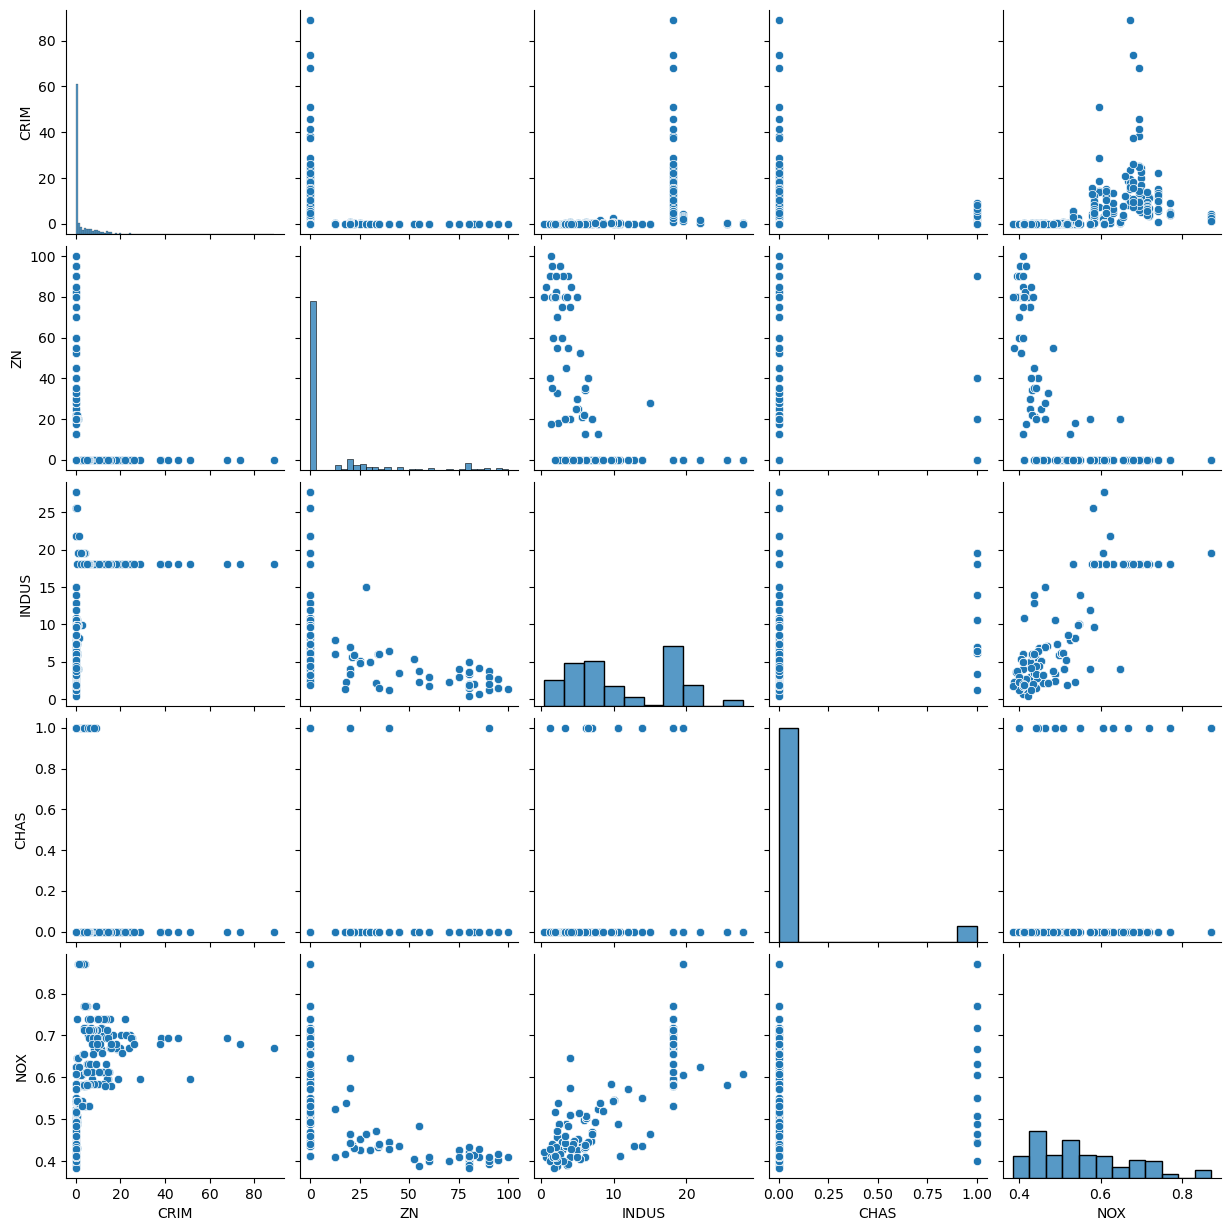

In [10]:
import seaborn as sns
sns.pairplot(df_boston.iloc[:, :5])

Looking at the scatterplots, there is a positive correlations between nitric oxide concentration and the number of acres zoned for industry in a census district, which is unsurprising. It also looks like there is a negative association between the number of acres zoned for residential buildings and the amount of nitric oxide and amount of acres zoned for industry. This also makes sense. Lastly, per capita crime appears to be positively correlated with the concentration of nitric oxides.

#### (d)

In [15]:
df_boston.corr()["CRIM"].sort_values(ascending=False)

CRIM       1.000000
RAD        0.622029
TAX        0.579564
LSTAT      0.452220
NOX        0.417521
INDUS      0.404471
AGE        0.350784
PTRATIO    0.288250
CHAS      -0.055295
ZN        -0.199458
RM        -0.219940
B         -0.377365
DIS       -0.377904
MDEV      -0.385832
Name: CRIM, dtype: float64

Most of the predictors are at least weakly associated with crime. The strongest correlation is between per capita crime and access to radial highways, maybe because areas close to highways are poorer or maybe because criminals use highways to move illegal drugs. Property tax rate is also positively associated with crime, perhaps because property taxes are higher closer to the city center where crime is more prevalent. Lastly, LSTAT, the percentage of people in the census district who are "lower status" (presumably in terms of income), is also positively correlated with per capita crime, which is what we expect.

#### (e)

             CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.593761  408.237154   18.455534
std      8.596783  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.647423  666.000000   20.200000
max     88.976200  711.000000   22.000000


array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>, <Axes: >]], dtype=object)

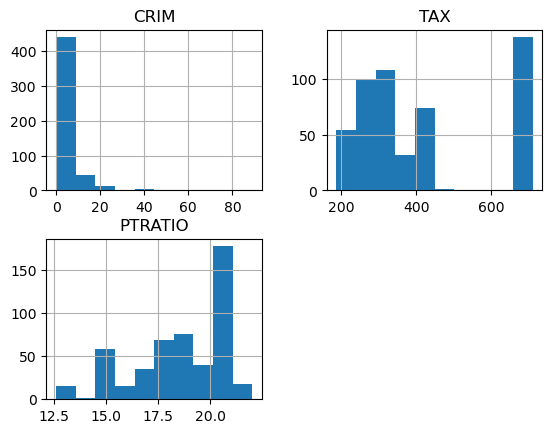

In [27]:
print(df_boston[["CRIM", "TAX", "PTRATIO"]].describe())
df_boston[["CRIM", "TAX", "PTRATIO"]].hist()

Most census tracts have low crime per capita since the mean is only about 3.6. However, a small number of census tracts have high per capita crime rates, up to a maximum of almost 89.

Census tracts in Boston have full-value property tax rates per $10,000 that vary from 187 to 711, but there is a large valley between about 450 and 650. A large group of census tracts have high property tax rates, possibly because they are close to the city center.

Lastly, pupil-teacher ratios vary from 12.6 to 22 pupils per teacher, with a large number of census districts having 20 to 21 pulis per teacher. These higher ratio census districts may also be closer to the city center where schools tend to have less funding per student. 

#### (f)